In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [2]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


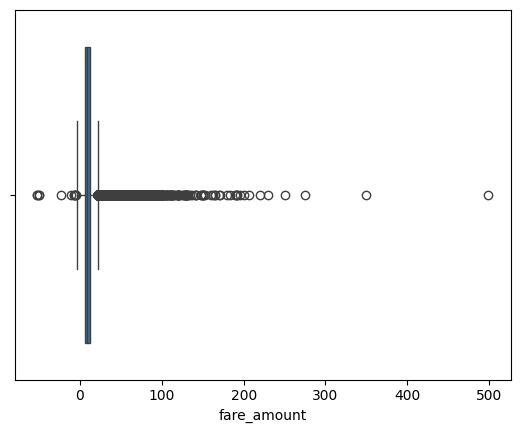

In [12]:
out = sns.boxplot(x=df["fare_amount"])

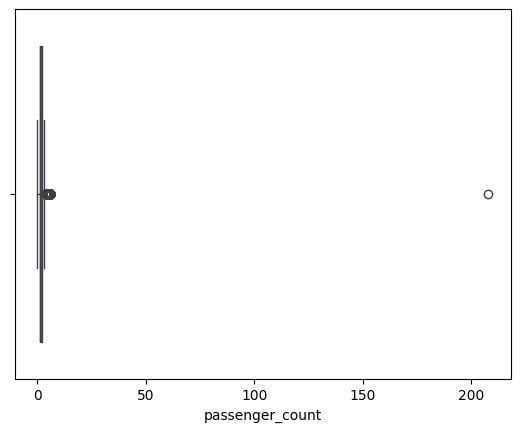

In [13]:
out1 = sns.boxplot(x=df["passenger_count"])

In [33]:

numeric = ['fare_amount','pickup_longitude','passenger_count']
outlier_in=set()
for col in numeric:
    q1 = df[col].quantile(0.40)
    q3 = df[col].quantile(0.60)
    IQR = q3-q1
    lower = q1-1.5*IQR
    high  = q3+1.5*IQR
    outlier= df[(df[col]<lower) | (df[col]>high)].index
    outlier_in.update(outlier)
df_cleaned = df.drop(index=outlier_in)

In [34]:
df_cleaned.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
10,2205147,2015-05-22 17:32:27.0000004,6.5,2015-05-22 17:32:27 UTC,-73.974388,40.746952,-73.988586,40.729805,1
14,48411337,2010-04-06 22:20:27.0000004,6.9,2010-04-06 22:20:27 UTC,-73.973370,40.755193,-73.978265,40.766375,1


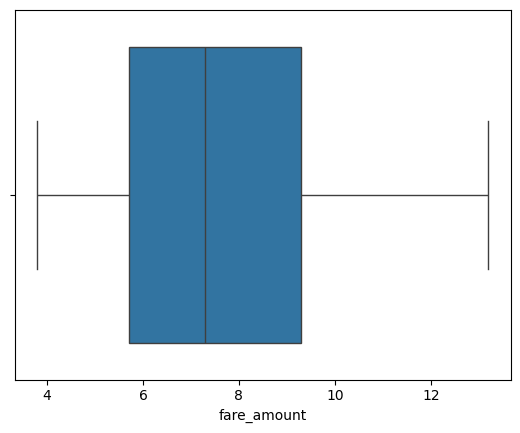

In [35]:
o = sns.boxplot(x=df_cleaned["fare_amount"])

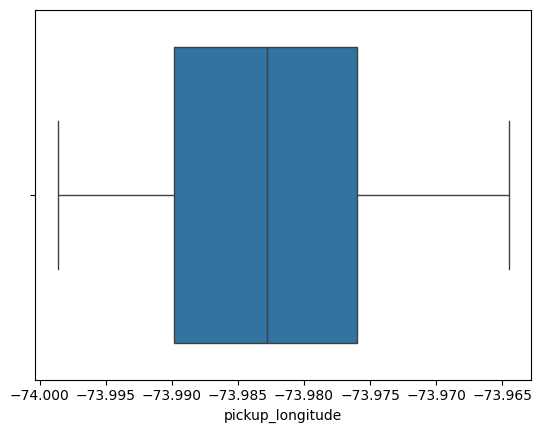

In [36]:
o = sns.boxplot(x=df_cleaned["pickup_longitude"])

In [37]:
import matplotlib.pyplot as plt

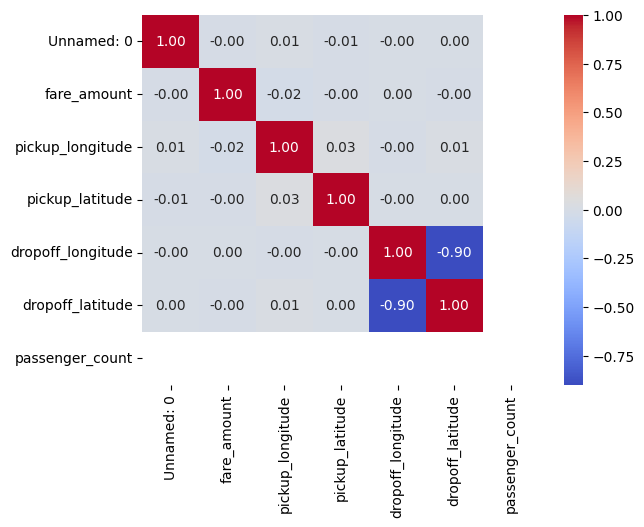

In [42]:
correlation_matrix = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [54]:
df_cleaned.drop('pickup_datetime',axis=1,inplace =True)

In [55]:
df_cleaned.dtypes

Unnamed: 0             int64
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [56]:
x=df_cleaned.drop('fare_amount',axis=1)
y=df_cleaned['fare_amount']


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [62]:
from sklearn.metrics import mean_squared_error
mes=mean_squared_error(y_test,y_pred)
mes

5.552638394427889

In [63]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.0007120474848300029

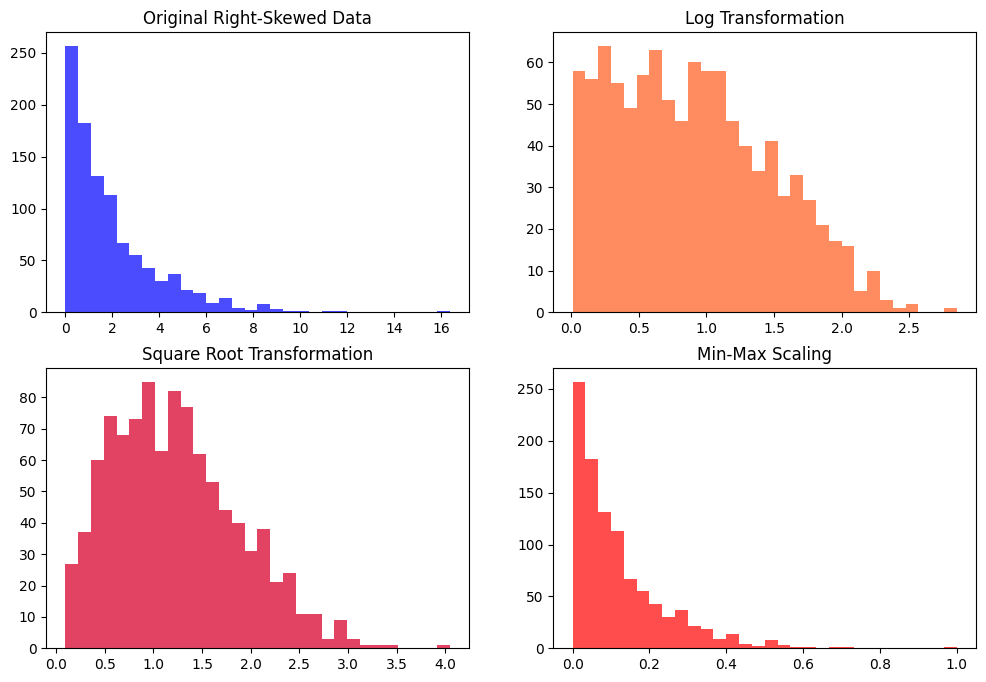

In [65]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)
df_cleaned = np.random.exponential(scale=2.0, size=1000)  

# Apply transformations
log_transformed = np.log1p(df_cleaned)  
sqrt_transformed = np.sqrt(df_cleaned)
scaler = MinMaxScaler()
minmax_transformed = scaler.fit_transform(df_cleaned.reshape(-1, 1)).flatten()
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(df_cleaned, bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title("Original Right-Skewed Data")

axes[0, 1].hist(log_transformed, bins=30, color='coral', alpha=0.9)
axes[0, 1].set_title("Log Transformation")

axes[1, 0].hist(sqrt_transformed, bins=30, color='crimson', alpha=0.8)
axes[1, 0].set_title("Square Root Transformation")

axes[1, 1].hist(minmax_transformed, bins=30, color='red', alpha=0.7)
axes[1, 1].set_title("Min-Max Scaling")
plt.show()